In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier   #MLPClassifier（多层感知器分类器）
from sklearn import datasets
import matplotlib

D:\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:529: Futu

In [2]:
# 把训练集和测试集导入
filename1 = 'F:/研究生涯/学习/pmi/pmi数据集/pca/99/train10.txt'
filename2 = 'F:/研究生涯/学习/pmi/pmi数据集/pca/99/test10.txt'

In [3]:
train_examples = np.loadtxt(filename1)
test_examples = np.loadtxt(filename2)
# train_labels = np.ones(3474)
train_labels = np.hstack((np.ones(3473), np.zeros(9234)))
# test_labels = np.ones(385)
test_labels = np.hstack((np.ones(386), np.zeros(1027)))

In [4]:
print(type(train_examples), type(train_labels))
print(train_examples.shape, train_labels.shape)
print(train_examples.dtype, train_labels.dtype)
print(train_examples.ndim, train_labels.ndim)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(12707, 3390) (12707,)
float64 float64
2 1


In [5]:
# 将每组特征与标签对应
# train_dataset = tf.data.Dataset.from_tensor_slices((train_examples, train_labels))
# test_dataset = tf.data.Dataset.from_tensor_slices((test_examples, test_labels))

In [ ]:
clf = MLPClassifier(solver='adam',alpha=1e-5,hidden_layer_sizes=(30,20,10),random_state=1)
clf.fit(train_examples, train_labels)
# mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(30,20,10), random_state=1)
# mlp.fit(train_examples, train_labels)

In [27]:
predictions = clf.predict(test_examples)

In [28]:
from sklearn.metrics import roc_auc_score
roc_auc_score(test_labels, predictions)

0.6255127112016993

In [29]:
print(predictions)

[0. 0. 1. ... 1. 0. 1.]


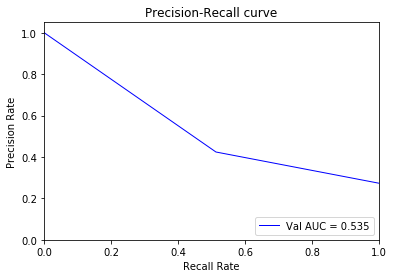

0.534993242477296


In [30]:
# 画Pr曲线
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
import pylab as plt
precision, recall, _ = precision_recall_curve(test_labels, predictions)
auc = metrics.auc(recall, precision)
plt.plot(recall,precision,'b',lw=1,label = 'Val AUC = %0.3f' % auc)
plt.legend(loc = 'lower right')
plt.title('Precision-Recall curve')

plt.xlabel('Recall Rate')
plt.ylabel('Precision Rate')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

print(auc)

In [31]:
# f = "F:/研究生涯/学习/pmi/pmi数据集/pca/99/随机森林pre.txt"
with open("F:/研究生涯/学习/pmi/pmi数据集/pca/99/MLPpre.txt",'ab') as f:
    np.savetxt(f, predictions, delimiter=" ")
with open("F:/研究生涯/学习/pmi/pmi数据集/pca/99/MLPlabel.txt",'ab') as f:
    np.savetxt(f, test_labels, delimiter=" ")